<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/2_1_4_1_Lab_Coffee_Roasting_in_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Coffee Roasting in Numpy

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

import tensorflow as tf

## Functions

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

## Weights

These weights were obtained by training in TensorFlow.

In [3]:
W1 = np.array([[-1.7463940e+01,  4.2496552e-03, -1.0702339e+01],
               [-1.4600339e+01, -8.4924965e+00, -2.5961140e-01]])

b1 = np.array([-2.5732396, -10.62283  , -11.66325])

W2 = np.array([[ 34.277275],
               [-43.019096],
               [-48.102776]])

b2 = np.array([-9.16911])

## Dataset

In [4]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Stanford-Andrew-Ng-Machine-Learning-Specialization/main/data/'
path += 'coffee.csv'

coffee = pd.read_csv(path)
coffee

,Temperature,Duration,Quality
0,185.32,12.69,1.0
1,259.92,11.87,0.0
2,231.01,14.41,0.0
3,175.37,11.72,0.0
4,187.12,14.13,1.0
...,...,...,...
195,223.78,15.30,0.0
196,266.63,12.48,0.0
197,273.68,13.10,0.0
198,220.61,12.80,1.0


In [5]:
X = coffee.drop('Quality', axis=1).values
Y = coffee[['Quality']].values
X.shape, Y.shape

((200, 2), (200, 1))

## Plot Coffee Roasting Data

The two features are Temperature in Celsius and Duration in minutes. 'Coffee Roasting at Home' suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as temperature rises, the duration should shrink.

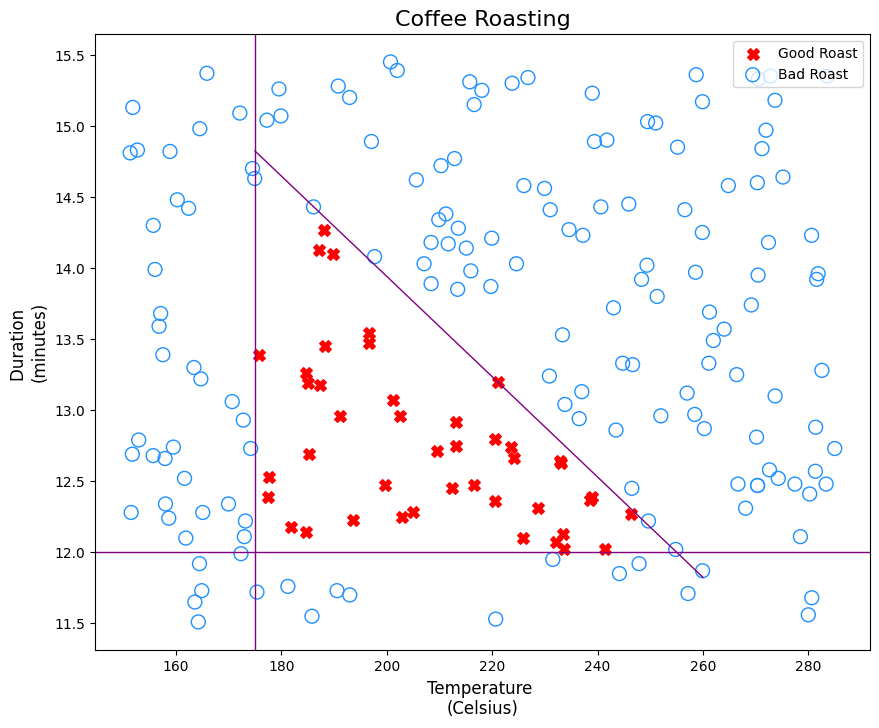

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

y = Y.reshape(-1, )

ax.scatter(X[y==1, 0], X[y==1, 1], s=70, marker='X', c='r', label='Good Roast')
ax.scatter(X[y==0, 0], X[y==0, 1], s=100, marker='o', facecolor='none',
           edgecolors='dodgerblue', linewidth=1, label='Bad Roast')
ax.axhline(y=12, color='purple', linewidth=1)
ax.axvline(x=175, color='purple', linewidth=1)
tr = np.linspace(175, 260, 50)
ax.plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)

ax.set_title('Coffee Roasting', size=16)
ax.set_xlabel("Temperature \n(Celsius)",size=12)
ax.set_ylabel("Duration \n(minutes)",size=12)
ax.legend(loc='upper right')

plt.show()

## Normalize Data

In [7]:
norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(X)  # learns mean, variance
Xn = norm_layer(X)

In [8]:
np.min(Xn[:, 0]), np.max(Xn[:, 0])

(-1.6853083, 1.6596596)

In [9]:
np.min(Xn[:, 1]), np.max(Xn[:, 1])

(-1.7021072, 1.7897574)

## Numpy Model (Forward Propagation in Numpy)

<img src='https://drive.google.com/uc?export=view&id=1E16ACEMFRfLNBA4MLac7wpULyboDcVgJ'>

In [10]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example

X_test_norm = norm_layer(X_test)
X_test_norm

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.46713647,  0.41605395],
       [-0.46713647,  3.1634607 ]], dtype=float32)>

In [11]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    return(a_out)

In [12]:
for test in X_test_norm:
    print(my_dense(test, W1, b1, sigmoid))

[3.79958354e-01 7.09892278e-07 1.14430888e-03]
[2.32503782e-18 5.22498654e-17 5.61090229e-04]


In [13]:
def dense_mat(A, W, B, g):
    Z = np.matmul(A, W) + B
    a_out = sigmoid(Z)
    return a_out

In [14]:
dense_mat(X_test_norm.numpy(), W1, b1, sigmoid)

array([[3.79958354e-01, 7.09892278e-07, 1.14430888e-03],
       [2.32503782e-18, 5.22498654e-17, 5.61090229e-04]])

## Build a two-layer neural network

In [15]:
# positive example
a1 = my_dense(X_test_norm[0], W1, b1, sigmoid)
a2 = my_dense(a1, W2, b2, sigmoid)
a2

array([0.97811342])

In [16]:
# negative example
a1 = my_dense(X_test_norm[1], W1, b1, sigmoid)
a2 = my_dense(a1, W2, b2, sigmoid)
a2

array([0.00010142])

### `my_sequential()`

In [17]:
def my_sequential(x, W1, b1, W2, b2, g):
    a1 = my_dense(x, W1, b1, g)
    a2 = my_dense(a1, W2, b2, g)
    return a2

In [18]:
my_sequential(X_test_norm[0], W1, b1, W2, b2, sigmoid)

array([0.97811342])

### `my_predict()`

In [19]:
def my_predict(X, W1, b1, W2, b2, g):
    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):
        p[i, 0] = my_sequential(X[i], W1, b1, W2, b2, g)

    return p

In [20]:
predictions = my_predict(X_test_norm, W1, b1, W2, b2, sigmoid)
predictions

array([[9.78113421e-01],
       [1.01423937e-04]])

In [21]:
y_hat = (predictions >= 0.5).astype(int)
y_hat

array([[1],
       [0]])

## Network Function

This graph shows the operation of the whole network and is identical to the Tensorflow result from the previous lab.
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.

In [22]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [23]:
def plt_prob(ax, fwb):
    """ plots a decision boundary but include shading to indicate the probability """
    x0_space = np.linspace(150, 285, 40)
    x1_space = np.linspace(11.5, 15.5, 40)

    # get probability for X0, X1 ranges
    tmp_X0, tmp_X1 = np.meshgrid(x0_space, x1_space)
    z = np.zeros_like(tmp_X0)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            x = np.array([[tmp_X0[i, j], tmp_X1[i, j]]])
            z[i, j] = fwb(x)

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_X0, tmp_X1, z, cmap=new_cmap,
                        norm=cm.colors.Normalize(vmin=0, vmax=1),
                        shading='nearest', alpha=0.9)
    ax.figure.colorbar(pcm, ax=ax)

In [24]:
def plt_network(X, Y, netf):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    y = Y.reshape(-1, )
    tr = np.linspace(175, 260, 50)

    # plot prob on left side
    plt_prob(ax[0], netf)

    # plot original data on left side
    ax[0].scatter(X[y==1, 0], X[y==1, 1], s=70, marker='X', c='r', label='Good Roast')
    ax[0].scatter(X[y==0, 0], X[y==0, 1], s=100, marker='o', facecolor='none',
            edgecolors='dodgerblue', linewidth=1, label='Bad Roast')
    ax[0].axhline(y=12, color='purple', linewidth=1)
    ax[0].axvline(x=175, color='purple', linewidth=1)
    ax[0].plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)
    ax[0].set_xlabel('Temperature\n(Celsius)', size=12)
    ax[0].set_ylabel('Duration\n(minutes)', size=12)
    ax[0].set_title('Network Probability')
    ax[0].legend(loc='upper right')

    fwb = netf(X)
    y_hat = (fwb > 0.5).astype(int).reshape(-1,)
    ax[1].scatter(X[y_hat==1, 0], X[y_hat==1, 1], s=70, marker='X', c='orange', label='Good Roast')
    ax[1].scatter(X[y_hat==0, 0], X[y_hat==0, 1], s=100, marker='o', facecolor='none',
            edgecolors='dodgerblue', linewidth=1, label='Bad Roast')
    ax[1].axhline(y=12, color='purple', linewidth=1)
    ax[1].axvline(x=175, color='purple', linewidth=1)
    ax[1].plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)
    ax[1].set_xlabel('Temperature\n(Celsius)', size=12)
    ax[1].set_ylabel('Duration\n(minutes)', size=12)
    ax[1].set_title('Network Decision')
    ax[1].legend(loc='upper right')

    plt.show()

In [25]:
netf = lambda x: my_predict(norm_layer(x), W1, b1, W2, b2, sigmoid)

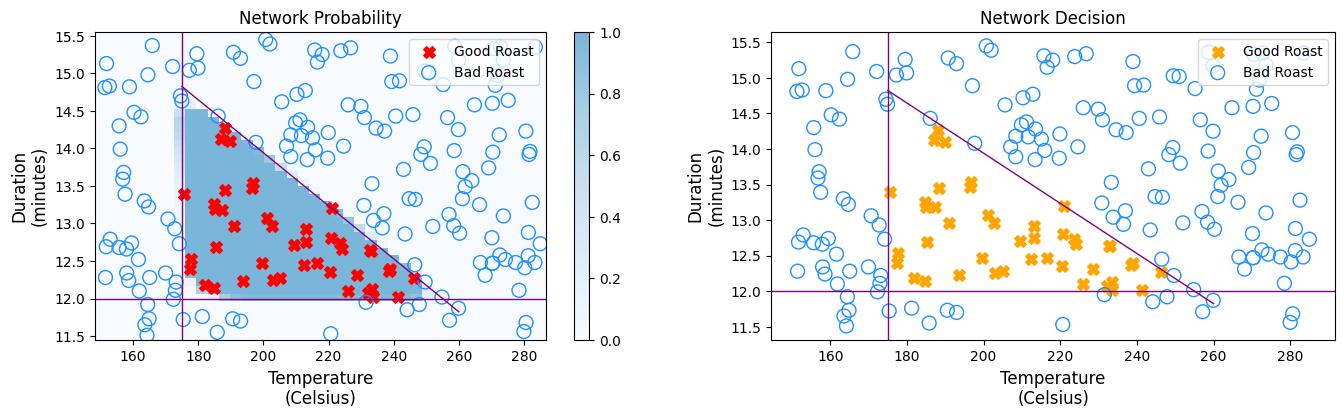

In [26]:
plt_network(X, Y, netf)